<a href="https://colab.research.google.com/github/pnabende/intelligent-systems-course-unit/blob/main/A_star_search_2D_grid_path_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A simple Implementation of A-star search to find the shortest path on a 2D grid. It assumes a grid with open spaces (0) and obstacles (1)**

**Imports**
*   numpy - used for numerical operations and for creating and manipulating the grid as an array
*   heapq - a heap queue algorithm, also known as a priority queue algorithm. It's used to fetch the node with the lowest cost during A-star search
*   matplotlib.pyplot - used for visualization.
*   random - used to randomly place obstacles on the grid.






In [8]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import random

**Grid definition**

In [ ]:
GRID_SIZE = 40

**Node class**

This class defines a node used in the A-star search algorithm.

*   x, y: are the actual coordinates of the node on the grid.
*   cost: is the actual cost from the start node to this node.
*   heuristic: the estimated cost from this node to the goal.

In [9]:
class Node:
    def __init__(self, x, y, cost, heuristic):
        self.x = x
        self.y = y
        self.cost = cost
        self.heuristic = heuristic

    def __lt__(self, other):
        return (self.cost + self.heuristic) < (other.cost + other.heuristic)


**A-star heuristic function**

This function calculates the Manhattan distance between two points. This heuristic is admissible and works well for a grid where we can move horizontally and vertically.

In [10]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

**A-star search algorithm**

This function implements the A-star search algorithm:

*   The function uses a priority queue (**heapq**) to always pick the next node with the lowest cost + heuristic.
*   **came_from** is a dictionary to backtrack from the goal to find the path.
*   **g_score** holds the shortest known distance to every node from the start node.

In [11]:
def astar(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, Node(start[0], start[1], 0, heuristic(start, goal)))
    came_from = {}
    g_score = {(x, y): float('inf') for x in range(GRID_SIZE) for y in range(GRID_SIZE)}
    g_score[start] = 0

    while open_set:
        current = heapq.heappop(open_set)

        if (current.x, current.y) == goal:
            path = []
            while (current.x, current.y) in came_from:
                path.append((current.x, current.y))
                current.x, current.y = came_from[(current.x, current.y)]
            path.append(start)
            return path[::-1]

        for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]:
            neighbor_x, neighbor_y = current.x + dx, current.y + dy

            if 0 <= neighbor_x < GRID_SIZE and 0 <= neighbor_y < GRID_SIZE and grid[neighbor_x][neighbor_y] == 0:
                tentative_g_score = g_score[(current.x, current.y)] + 1
                if tentative_g_score < g_score[(neighbor_x, neighbor_y)]:
                    came_from[(neighbor_x, neighbor_y)] = (current.x, current.y)
                    g_score[(neighbor_x, neighbor_y)] = tentative_g_score
                    heapq.heappush(open_set, Node(neighbor_x, neighbor_y, tentative_g_score, heuristic((neighbor_x, neighbor_y), goal)))

    return []


**Visualization function**

*   **imshow** shows the grid with obstacles.
*   The path, if it exists, is plotted with blue dots using **scatter**


In [21]:
def visualize(grid, path):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Set the grid color
    cmap = plt.get_cmap('gray_r')
    ax.imshow(grid, cmap=cmap, origin='upper', extent=[0, GRID_SIZE, 0, GRID_SIZE])

    # Plot the path in blue
    for (x, y) in path:
        rect = plt.Rectangle((y, GRID_SIZE-1-x), 1, 1, facecolor='blue')
        ax.add_patch(rect)

    # Plot start and end in green and red
    rect = plt.Rectangle((start[1], GRID_SIZE-1-start[0]), 1, 1, facecolor='green')
    ax.add_patch(rect)
    rect = plt.Rectangle((goal[1], GRID_SIZE-1-goal[0]), 1, 1, facecolor='red')
    ax.add_patch(rect)

    plt.show()

Main execution

In [24]:
grid = np.zeros((GRID_SIZE, GRID_SIZE)) # the grid is initialized with zeros (open spaces)

#(150 obstacles are randomly placed on the grid.)
for _ in range(150):
    grid[random.randint(0, GRID_SIZE-1)][random.randint(0, GRID_SIZE-1)] = 1



Generated path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 12), (5, 13), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (6, 20), (7, 20), (8, 20), (8, 21), (8, 22), (8, 23), (8, 24), (8, 25), (8, 26), (9, 26), (10, 26), (11, 26), (12, 26), (12, 27), (13, 27), (14, 27), (14, 28), (15, 28), (16, 28), (17, 28), (17, 29), (18, 29), (18, 30), (19, 30), (19, 31), (19, 32), (20, 32), (21, 32), (22, 32), (23, 32), (24, 32), (25, 32), (26, 32), (27, 32), (28, 32), (29, 32), (30, 32), (31, 32), (32, 32), (33, 32), (33, 33), (33, 34), (34, 34), (35, 34), (36, 34), (36, 35), (37, 35), (38, 35), (38, 36), (39, 36), (39, 37), (39, 38), (39, 39)]


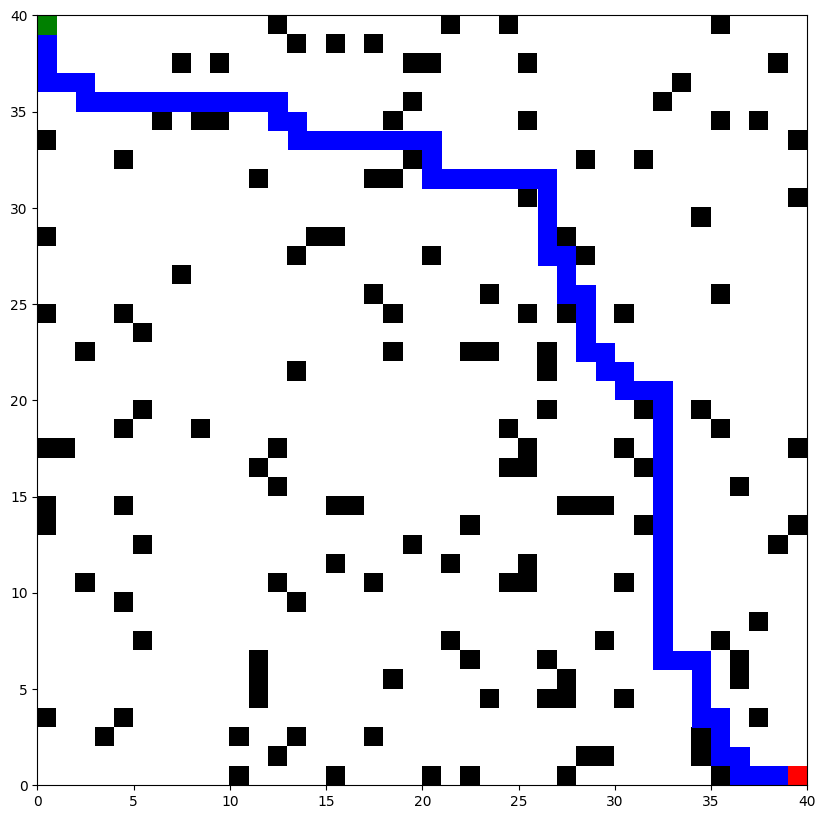

In [25]:
# the start is the top-left corner, and the goal is the bottom-right corner.
start = (0, 0)
goal = (GRID_SIZE-1, GRID_SIZE-1)

# the path is calculated using the A-star algorithm and printed.
path = astar(grid, start, goal)
print("Generated path:", path)

# the grid, obstacles, and path are visualized.
visualize(grid, path)
